In [1]:
import numpy as np
from matplotlib import pyplot as plt 
import glauber 

In [2]:
rng = np.random.default_rng()

def calc_mag(spins):
    return np.mean(spins,axis=0)

In [28]:
### This method will generate the nearest-neighbor exchange matrix of couplings 
def nn_coupling(J,Lx,Ly):
    J_matrix = np.zeros((Lx*Ly,Lx*Ly))
    sites = np.arange(Lx*Ly)
    for r in sites:
        x = r%Lx 
        y = r//Lx
        
        rpx = (x+1)%Lx + y*Lx
        rmx = (x-1)%Lx + y*Lx
        rpy = x%Lx + ( (y+1)%Ly )*Lx
        rmy = x%Lx + ( (y-1)%Ly )*Lx 
        
        J_matrix[rpx,r] = J
        J_matrix[rmx,r] = J 
        J_matrix[rpy,r] = J 
        J_matrix[rmy,r] = J 

    return 0.5*( J_matrix + np.transpose(J_matrix))


def simulate_trajectory(initial_spins,nsteps,J_matrix,T):
    Nspins = len(initial_spins)
    
    spin_trajectory = np.zeros((Nspins,nsteps))
    spin_trajectory[:,0] = initial_spins[:]

    for i in range(1,nsteps):
        r = rng.choice(np.arange(Lx*Ly))
        
        p = rng.uniform()
    
        curie_field = np.sum(J_matrix[r,:]*spin_trajectory[:,i-1])
    
        spin_trajectory[:,i] = spin_trajectory[:,i-1]
    
        if p < np.exp(-curie_field*spin_trajectory[r,i-1]/T):
            spin_trajectory[r,i] *= -1 

    return spin_trajectory
    


In [63]:
Lx = 100
Ly = 100

J_matrix = nn_coupling(1.,Lx,Ly)

T = 0.03
nsteps = 5000

initial_spins = rng.choice([-1,1],Lx*Ly)


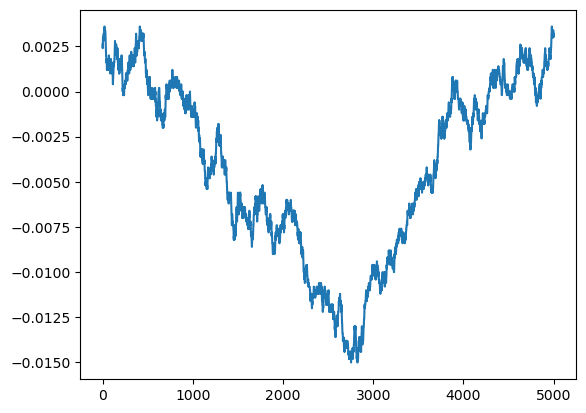

In [64]:
spins = simulate_trajectory(initial_spins,nsteps,J_matrix,T)
plt.plot(calc_mag(spins) )
plt.show()

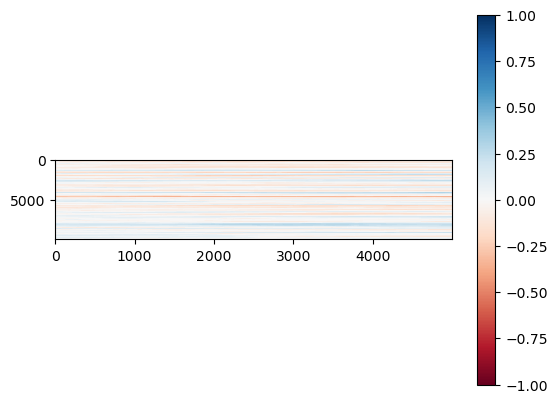

In [65]:
plt.imshow(spins,cmap='RdBu',aspect=0.1)
plt.colorbar()
plt.show()